### Aprendizaje supervisado

### Analisis exploratorio

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
PasajerosAerolineas = pd.read_csv('Passanger_booking_data.csv')

* Vamos a visualizar el DataFrame y observa cuantas filas y columnas tiene.

In [7]:
PasajerosAerolineas.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [8]:
PasajerosAerolineas.shape

(50002, 14)

* Veamos el nombre y tipo de datos de las columnas contenidas en el Dataset

In [9]:
PasajerosAerolineas.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
PasajerosAerolineas.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

* Modificamos el nombre de las columnas para que sea mas comodo trabajar

In [11]:
PasajerosAerolineas = PasajerosAerolineas.rename(columns=
                           {'num_passengers':'NumeroDePasajeros',
                            'sales_channel' : 'CanalDeVenta',
                            'trip_type'     : 'TipoDeViaje',
                            'purchase_lead' : 'ClientePotencial',
                            'length_of_stay': 'Estadia',
                            'flight_hour'   : 'HorarioDelVuelo',
                            'flight_day'    : 'DiaDelVuelo',
                            'route'         : 'Ruta',
                            'booking_origin': 'OrigenReserva',
                            'wants_extra_baggage' : 'EquipajeExtra',
                            'wants_preferred_seat': 'AsientosPreferido',
                            'wants_in_flight_meals': 'QuiereComidaEnVuelo',
                            'flight_duration'      : 'DuracionDelVuelo',
                            'booking_complete'     : 'ReservaCompleta'
                            })

* Vemos como quedaron las columnas con el nuevo nombre asignado

In [12]:
PasajerosAerolineas.columns

Index(['NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
       'Estadia', 'HorarioDelVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

* Chequeamos si el Dataframe tiene valores faltantes y vemos las filas que los tienen.

In [13]:
PasajerosAerolineas.isna().sum()

NumeroDePasajeros      0
CanalDeVenta           0
TipoDeViaje            0
ClientePotencial       0
Estadia                0
HorarioDelVuelo        0
DiaDelVuelo            0
Ruta                   0
OrigenReserva          0
EquipajeExtra          0
AsientosPreferido      0
QuiereComidaEnVuelo    0
DuracionDelVuelo       0
ReservaCompleta        0
dtype: int64

* No hay valores faltanes

* Descripcion estadistica del Dataframe PasajerosAerolinas, por columna

In [14]:
PasajerosAerolineas.describe()

,NumeroDePasajeros,ClientePotencial,Estadia,HorarioDelVuelo,EquipajeExtra,AsientosPreferido,QuiereComidaEnVuelo,DuracionDelVuelo,ReservaCompleta
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


* Exploramos los datos del Dataframe PasajerosAerolineas
* Veamos los valores existentes dentro de las columnas

In [15]:
PasajerosAerolineas.columns

Index(['NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
       'Estadia', 'HorarioDelVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

In [16]:
PasajerosAerolineas["NumeroDePasajeros"].value_counts()

1    31353
2    12804
3     2942
4     1784
5      561
6      289
7      114
8       89
9       66
Name: NumeroDePasajeros, dtype: int64

* Observamos que la mayoria de los vuelos son de 1 solo pasajero

In [ ]:
PasajerosAerolineas["CanalDeVenta"].value_counts()

Internet    44383
Mobile       5619
Name: CanalDeVenta, dtype: int64

* Visualizamos que el canal de preferencia es "Internet"

In [17]:
PasajerosAerolineas["TipoDeViaje"].value_counts()

RoundTrip     49498
OneWay          387
CircleTrip      117
Name: TipoDeViaje, dtype: int64

* La preferencia de los clientes es reservar pasajes de "Ida y Vuelta" / "RoundTrip"

In [18]:
PasajerosAerolineas["Estadia"].value_counts()

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
379       1
226       1
415       1
778       1
12        1
Name: Estadia, Length: 336, dtype: int64

* La estadia mas frecuente es de 6 dias de duracion

In [19]:
PasajerosAerolineas["HorarioDelVuelo"].value_counts()

8     3165
12    3163
9     3133
7     3126
11    3110
13    3101
10    3085
6     3051
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: HorarioDelVuelo, dtype: int64

* Los horarios de vuelo mas elegido son 8 AM, 12 AM y 9 AM

In [20]:
PasajerosAerolineas["DiaDelVuelo"].value_counts()

Mon    8102
Wed    7675
Tue    7674
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: DiaDelVuelo, dtype: int64

* El dia mas elegido para volar es el dia lunes

In [21]:
PasajerosAerolineas["Ruta"].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
DELKBR       1
LBUTPE       1
KOSSYD       1
OOLWUH       1
MRUXIY       1
Name: Ruta, Length: 799, dtype: int64

In [22]:
PasajerosAerolineas['Ruta'].unique()

array(['AKLHGH', 'AKLDEL', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [23]:
#Podriamos tomar la decision de eliminar esta columnna ya que no es relevante para nuestra prediccion!!

* Separa los codigos en una nueva columna (iata)(icao)

In [24]:
PasajerosAerolineas["OrigenReserva"].value_counts()

Australia               17873
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Tanzania                    1
Jordan                      1
Lebanon                     1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: OrigenReserva, Length: 104, dtype: int64

In [25]:
PasajerosAerolineas["OrigenReserva"].value_counts()/PasajerosAerolineas.shape[0] * 100

Australia               35.744570
Malaysia                14.347426
South Korea              9.117635
Japan                    7.769689
China                    6.773729
                          ...    
Tanzania                 0.002000
Jordan                   0.002000
Lebanon                  0.002000
Bulgaria                 0.002000
Svalbard & Jan Mayen     0.002000
Name: OrigenReserva, Length: 104, dtype: float64

* El 35.74 % de las reservas se realizan desde Asutralia

In [26]:
PasajerosAerolineas["OrigenReserva"].unique()

array(['Australia', 'New Zealand', 'India', 'United Kingdom', 'China',
       'South Korea', 'Canada', 'Japan', 'Malaysia', 'Singapore',
       'Switzerland', 'Germany', 'Indonesia', 'Czech Republic', 'Vietnam',
       'Thailand', 'Spain', 'Romania', 'Ireland', 'Italy', 'Slovakia',
       'United Arab Emirates', 'Tonga', 'Réunion', '(not set)',
       'Saudi Arabia', 'Netherlands', 'Qatar', 'Hong Kong', 'Philippines',
       'Sri Lanka', 'France', 'Croatia', 'United States', 'Laos',
       'Hungary', 'Portugal', 'Cyprus', 'Cambodia', 'Poland', 'Belgium',
       'Oman', 'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya',
       'Taiwan', 'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark',
       'Colombia', 'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia',
       'Mauritius', 'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden',
       'Austria', 'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [27]:
PasajerosAerolineas["EquipajeExtra"].value_counts()

1    33440
0    16562
Name: EquipajeExtra, dtype: int64

* Mas de la mitad de los pasajeron eligen llevar equipaje extra

In [28]:
PasajerosAerolineas["AsientosPreferido"].value_counts()

0    35153
1    14849
Name: AsientosPreferido, dtype: int64

* La eleccion del asiento parece no ser relevante

In [29]:
PasajerosAerolineas["QuiereComidaEnVuelo"].value_counts()

0    28644
1    21358
Name: QuiereComidaEnVuelo, dtype: int64

* La mayoria de los pasajero prefieron no comer durante el vuelo

In [30]:
PasajerosAerolineas["DuracionDelVuelo"].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      668
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
7.21        1
Name: DuracionDelVuelo, dtype: int64

* El promedio de duracion de los vuelos es de 8 hs

In [31]:
PasajerosAerolineas["ReservaCompleta"].value_counts()

0    42523
1     7479
Name: ReservaCompleta, dtype: int64

In [32]:
PasajerosAerolineas.groupby(by=['CanalDeVenta', 'TipoDeViaje'])['DuracionDelVuelo'].mean()

CanalDeVenta  TipoDeViaje
Internet      CircleTrip     7.834911
              OneWay         8.003225
              RoundTrip      7.290835
Mobile        CircleTrip     5.746000
              OneWay         7.219444
              RoundTrip      7.115645
Name: DuracionDelVuelo, dtype: float64

In [33]:
PasajerosAerolineas.groupby(by=['CanalDeVenta', 'TipoDeViaje'])['DiaDelVuelo'].count()

CanalDeVenta  TipoDeViaje
Internet      CircleTrip       112
              OneWay           369
              RoundTrip      43902
Mobile        CircleTrip         5
              OneWay            18
              RoundTrip       5596
Name: DiaDelVuelo, dtype: int64

In [34]:
PasajerosAerolineas.groupby(by=['NumeroDePasajeros','Estadia'])['EquipajeExtra'].count()

NumeroDePasajeros  Estadia
1                  0             5
                   1           209
                   2           699
                   3          1922
                   4          3206
                              ... 
9                  17            2
                   18            1
                   20            1
                   22            1
                   30            1
Name: EquipajeExtra, Length: 810, dtype: int64

In [35]:
PasajerosAerolineas.groupby(by=['CanalDeVenta','DiaDelVuelo'])['NumeroDePasajeros'].count()

CanalDeVenta  DiaDelVuelo
Internet      Fri            5947
              Mon            7269
              Sat            5008
              Sun            5665
              Thu            6681
              Tue            6901
              Wed            6912
Mobile        Fri             814
              Mon             833
              Sat             804
              Sun             889
              Thu             743
              Tue             773
              Wed             763
Name: NumeroDePasajeros, dtype: int64

## Visualización de datos

In [36]:
PasajerosAerolineas.columns

Index(['NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
       'Estadia', 'HorarioDelVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

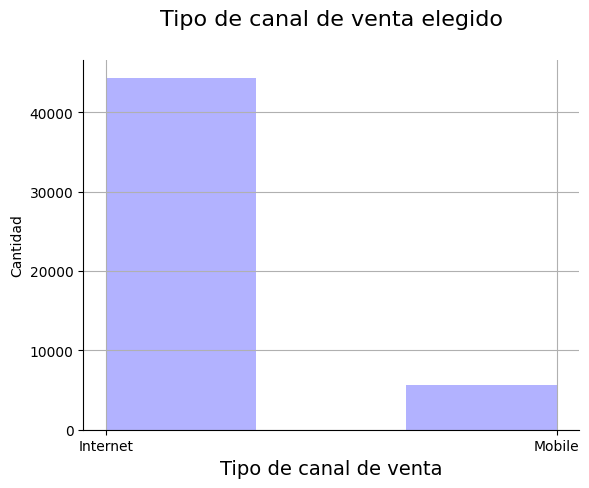

In [37]:
plt.figure()
plt.hist(PasajerosAerolineas['CanalDeVenta'].dropna(), bins=3, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=10)
plt.xlabel("Tipo de canal de venta", size=14)
plt.title("Tipo de canal de venta elegido", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

* Se puede ver claramente que el canal mas elegido para realizar las reservas es Internet

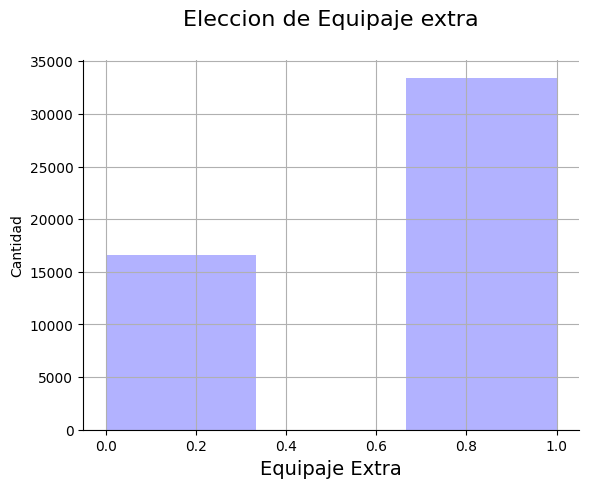

In [38]:
plt.figure()
plt.hist(PasajerosAerolineas['EquipajeExtra'].dropna(), bins=3, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=10)
plt.xlabel("Equipaje Extra", size=14)
plt.title("Eleccion de Equipaje extra", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribucion de vuelos en dias de la semana')

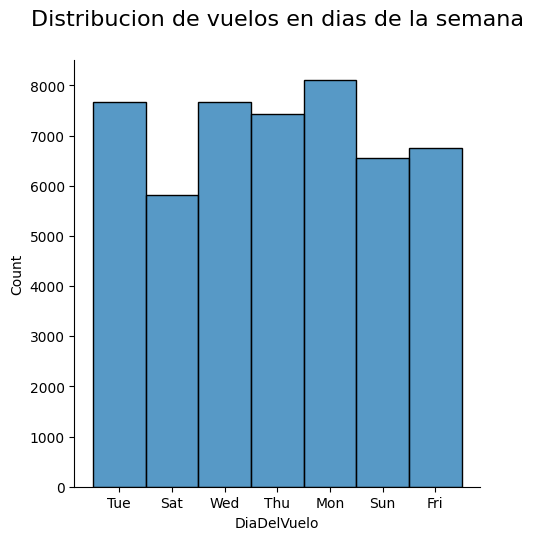

In [39]:
grafico_2=sns.displot(PasajerosAerolineas['DiaDelVuelo'])
plt.title("Distribucion de vuelos en dias de la semana", size=16, pad=25)

* Podemos ver que el dia que mas se vuela es el dia LUNES

<Figure size 640x480 with 0 Axes>

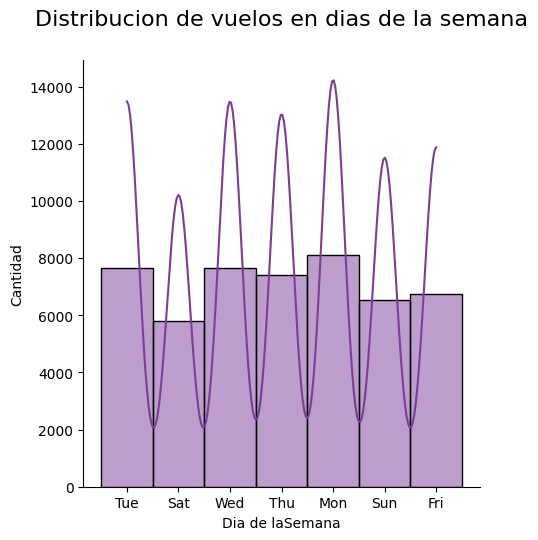

In [40]:
plt.figure()
sns.displot(PasajerosAerolineas["DiaDelVuelo"], color="#7D3C98", kde=True)
plt.title("Distribucion de vuelos en dias de la semana", size=16, pad=25)
plt.xlabel('Dia de laSemana')
plt.ylabel('Cantidad')
sns.despine()
plt.show()

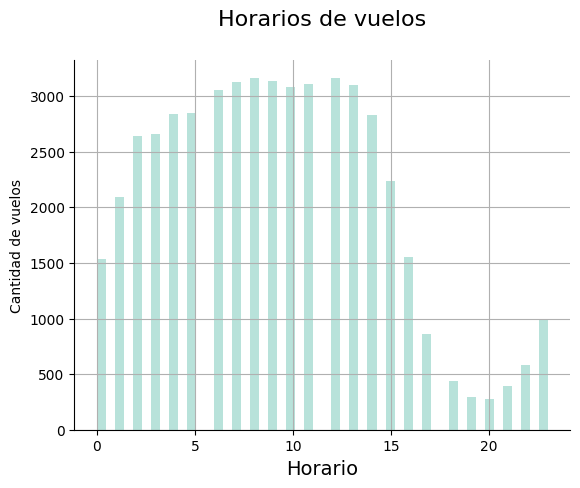

In [41]:
plt.figure()
plt.hist(PasajerosAerolineas['HorarioDelVuelo'].dropna(), bins=50, color="#16A085", alpha=0.3)
plt.ylabel("Cantidad de vuelos", size=10)
plt.xlabel("Horario", size=14)
plt.title("Horarios de vuelos", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

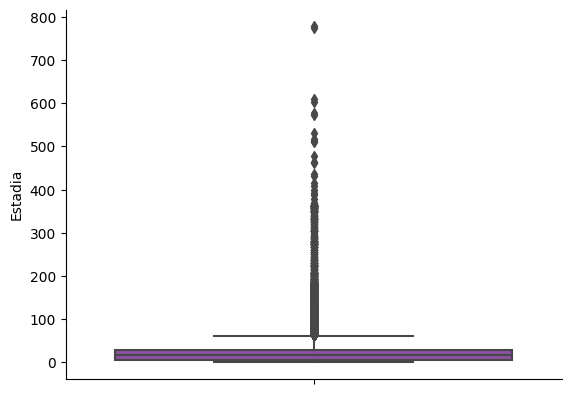

In [42]:
sns.boxplot(y = PasajerosAerolineas['Estadia'],
            color = "#8E44AD")
sns.despine()

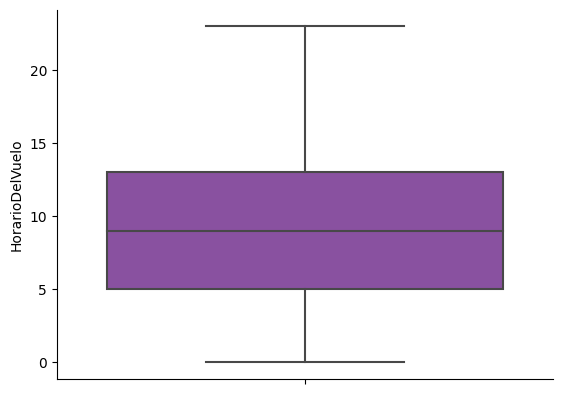

In [43]:
sns.boxplot(y = PasajerosAerolineas['HorarioDelVuelo'],
            color = "#8E44AD")
sns.despine()

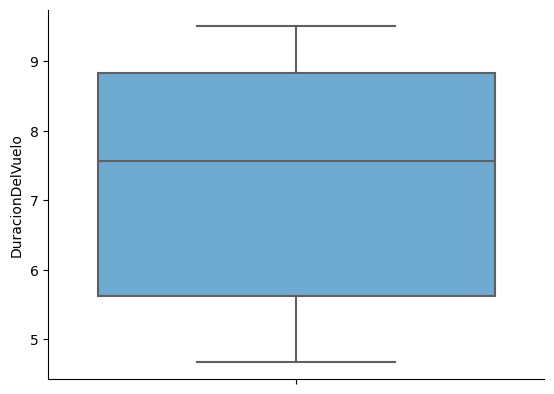

In [44]:
sns.boxplot(y = PasajerosAerolineas['DuracionDelVuelo'],
            color = "#5DADE2")
sns.despine()

In [45]:
# 'NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
# 'Estadia', 'HorasDeVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
# 'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
# 'DuracionDelVuelo', 'ReservaCompleta']

boxplot_PasajerosAerolineas = PasajerosAerolineas.melt(id_vars='CanalDeVenta', value_vars=['DuracionDelVuelo'])
print(boxplot_PasajerosAerolineas)

      CanalDeVenta          variable  value
0         Internet  DuracionDelVuelo   7.21
1         Internet  DuracionDelVuelo   5.52
2         Internet  DuracionDelVuelo   5.52
3         Internet  DuracionDelVuelo   5.52
4         Internet  DuracionDelVuelo   5.52
...            ...               ...    ...
49997     Internet  DuracionDelVuelo   5.62
49998     Internet  DuracionDelVuelo   5.62
49999     Internet  DuracionDelVuelo   5.62
50000     Internet  DuracionDelVuelo   5.62
50001     Internet  DuracionDelVuelo   5.62

[50002 rows x 3 columns]


In [46]:
boxplot_PasajerosAerolineas = PasajerosAerolineas.melt(id_vars='Estadia', value_vars=['EquipajeExtra'])
print(boxplot_PasajerosAerolineas)

       Estadia       variable  value
0           12  EquipajeExtra      0
1           19  EquipajeExtra      1
2           20  EquipajeExtra      0
3           22  EquipajeExtra      1
4           31  EquipajeExtra      0
...        ...            ...    ...
49997        6  EquipajeExtra      1
49998        6  EquipajeExtra      0
49999        6  EquipajeExtra      0
50000        6  EquipajeExtra      1
50001        6  EquipajeExtra      0

[50002 rows x 3 columns]


In [47]:
boxplot_PasajerosAerolineas.head()

,Estadia,variable,value
0,12,EquipajeExtra,0
1,19,EquipajeExtra,1
2,20,EquipajeExtra,0
3,22,EquipajeExtra,1
4,31,EquipajeExtra,0


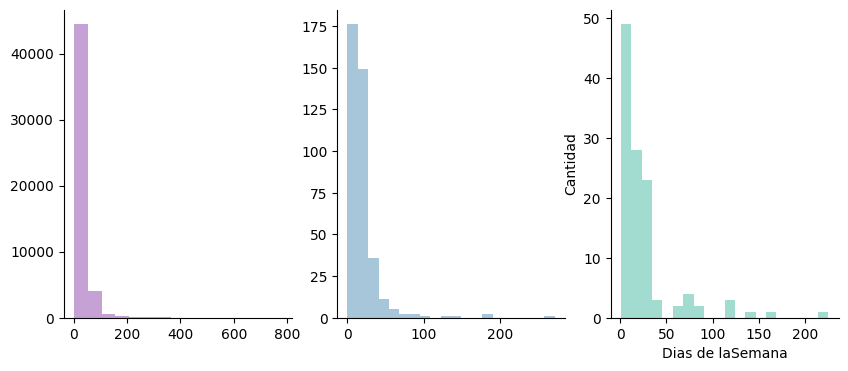

In [51]:
# Distribucion de la estadia , segun el tipo de Viaje reservado
# Podriamos ajustar la estadia a rangos para poder visualizarlo mejor
# Inicio subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
# Establezco colores
colors = np.arange(959)

# primer grafico
ax[0].hist(PasajerosAerolineas[PasajerosAerolineas['TipoDeViaje'] == 'RoundTrip']["Estadia"], color="#8E44AD", alpha=0.5, bins=15)
# segundo grafico
ax[1].hist(PasajerosAerolineas[PasajerosAerolineas['TipoDeViaje'] == 'OneWay']["Estadia"], color="#2471A3", alpha=0.4, bins=20)
# segundo grafico
ax[2].hist(PasajerosAerolineas[PasajerosAerolineas['TipoDeViaje'] == 'CircleTrip']["Estadia"], color="#17A589", alpha=0.4, bins=20)
# modifico primer grafico


ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

# modifico segundo grafico
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)


plt.xlabel('Dias de laSemana')
plt.ylabel('Cantidad')

plt.show()
#NumeroDePasa

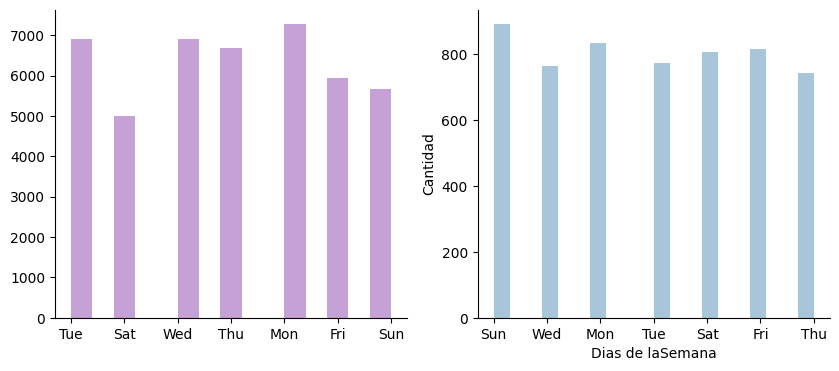

In [49]:
# Preferncia por dias de vuelo, segun el canal de venta elegido
# Inicio subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Establezco colores
colors = np.arange(959)
# primer grafico
ax[0].hist(PasajerosAerolineas[PasajerosAerolineas['CanalDeVenta'] == 'Internet']["DiaDelVuelo"], color="#8E44AD", alpha=0.5, bins=15)
# segundo grafico
ax[1].hist(PasajerosAerolineas[PasajerosAerolineas['CanalDeVenta'] == 'Mobile']["DiaDelVuelo"], color="#2471A3", alpha=0.4, bins=20)
# modifico primer grafico
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
# modifico segundo grafico
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

plt.xlabel('Dias de laSemana')
plt.ylabel('Cantidad')

plt.show()

In [50]:
PasajerosAerolineas['EquipajeExtra'].unique()

array([0, 1])